# Data Driven Dealings Development


*   EDA on Sales Data
*   RFM Clustering
*   Predicting Sales
*   Market Basket Analysis
*   Recommending Items per Customer







In [1]:
# To be able to use your data stored in your Google Drive you first need to mount your Google Drive so you can load and save files to it. 
from google.colab import drive
drive.mount('/content/gdrive')
#You'll need to put in a token which Google will generate for you as soon as you click on the link

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import pandas as pd
data = pd.read_excel('/content/gdrive/My Drive/market-basket.xlsx')
data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,3.39,17850.0,United Kingdom


## Apriori


In [5]:
df1 = data[['CustomerID','BillNo','Itemname']]
df1.head()

,CustomerID,BillNo,Itemname
0,17850.0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,17850.0,536365,WHITE METAL LANTERN
2,17850.0,536365,CREAM CUPID HEARTS COAT HANGER
3,17850.0,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,17850.0,536365,RED WOOLLY HOTTIE WHITE HEART.


In [11]:
df=df1.groupby ('CustomerID') ['Itemname']. apply (lambda x: x.reset_index (drop = True)). unstack (). reset_index ()
df.drop('CustomerID',axis=1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,7837,7838,7839,7840,7841,7842,7843,7844,7845,7846
0,MEDIUM CERAMIC TOP STORAGE JAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BLACK CANDELABRA T-LIGHT HOLDER,AIRLINE BAG VINTAGE JET SET BROWN,COLOUR GLASS. STAR T-LIGHT HOLDER,MINI PAINT SET VINTAGE,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,PINK DRAWER KNOB ACRYLIC EDWARDIAN,GREEN DRAWER KNOB ACRYLIC EDWARDIAN,RED DRAWER KNOB ACRYLIC EDWARDIAN,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,BLUE DRAWER KNOB ACRYLIC EDWARDIAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PARISIENNE CURIO CABINET,SWEETHEART WALL TIDY,PINK HEART SHAPE LOVE BUCKET,GINGHAM HEART DOORSTOP RED,RED HEART SHAPE LOVE BUCKET,FOOD CONTAINER SET 3 LOVE HEART,LARGE HEART MEASURING SPOONS,DOORMAT HEARTS,HANGING HEART JAR T-LIGHT HOLDER,BROCANTE SHELF WITH HOOKS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CHOCOLATE THIS WAY METAL SIGN,METAL SIGN NEIGHBOURHOOD WITCH,RETRO MOD TRAY,RETRO PLASTIC ELEPHANT TRAY,TEA BAG PLATE RED RETROSPOT,PINK/PURPLE RETRO RADIO,PLASTERS IN TIN SPACEBOY,PLASTERS IN TIN VINTAGE PAISLEY,CHOCOLATE CALCULATOR,RED HARMONICA IN BOX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WOODEN HAPPY BIRTHDAY GARLAND,PINK DOUGHNUT TRINKET POT,STRAWBERRY CERAMIC TRINKET BOX,CERAMIC STRAWBERRY CAKE MONEY BANK,WOODEN OWLS LIGHT GARLAND,REGENCY CAKESTAND 3 TIER,DELUXE SEWING KIT,WELCOME WOODEN BLOCK LETTERS,LOVE BUILDING BLOCK WORD,BATH BUILDING BLOCK WORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
items = (df[0].unique())
items

array(['MEDIUM CERAMIC TOP STORAGE JAR',
       'BLACK CANDELABRA T-LIGHT HOLDER', 'PARISIENNE CURIO CABINET', ...,
       'SET OF 16 VINTAGE ROSE CUTLERY', 'ROBOT BIRTHDAY CARD',
       'ANTIQUE CREAM CUTLERY CUPBOARD'], dtype=object)

In [13]:
encoded_vals = []
def custom():
    for index, row in df.iterrows():
        labels = {}
        uncommons = list(set(items) - set(row))
        commons = list(set(items).intersection(row))
        for uc in uncommons:
            labels[uc] = 0
        for com in commons:
            labels[com] = 1
        encoded_vals.append(labels)
custom()
ohe_df = pd.DataFrame(encoded_vals)
print(ohe_df)

      RECIPE BOX RETROSPOT  HOME SWEET HOME METAL SIGN  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   
...                    ...                         ...   
4292                     0                           0   
4293                     0                           0   
4294                     0                           0   
4295                     0                           0   
4296                     0                           0   

      RETROSPOT HEART HOT WATER BOTTLE  PINK METAL CHICKEN HEART  \
0                                    0                         0   
1                                    0                         0   
2                                    0                         0   
3                              

In [14]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [20]:
freq_items = apriori(ohe_df, min_support=0.06, use_colnames=True) #, verbose=1 #min_support=0.006, 
freq_items

,support,itemsets
0,0.085641,(RETROSPOT HEART HOT WATER BOTTLE)
1,0.073307,(PINK REGENCY TEACUP AND SAUCER)
2,0.088667,(GREEN REGENCY TEACUP AND SAUCER)
3,0.109146,(HOT WATER BOTTLE KEEP CALM)
4,0.112869,(LUNCH BAG SPACEBOY DESIGN)
...,...,...
199,0.075401,"(PAPER CHAIN KIT VINTAGE CHRISTMAS, PAPER CHAI..."
200,0.061205,"(GARDENERS KNEELING PAD CUP OF TEA, GARDENERS ..."
201,0.073307,"(ROSES REGENCY TEACUP AND SAUCER, REGENCY CAKE..."
202,0.068885,"(REGENCY CAKESTAND 3 TIER, SET OF 3 REGENCY CA..."


In [21]:
freq_items.to_excel('Export&Supportvalues.xlsx')

In [22]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.06)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.088667,0.073307,0.067954,0.766404,10.454726,0.061455,3.967079
1,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.073307,0.088667,0.067954,0.926984,10.454726,0.061455,12.481306
2,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.073307,0.097044,0.062369,0.850794,8.767051,0.055255,6.051723
3,(ROSES REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.097044,0.073307,0.062369,0.642686,8.767051,0.055255,2.593497
4,(GREEN REGENCY TEACUP AND SAUCER),(REGENCY CAKESTAND 3 TIER),0.088667,0.202234,0.067722,0.763780,3.776710,0.049790,3.377209
...,...,...,...,...,...,...,...,...,...
63,(REGENCY CAKESTAND 3 TIER),(ROSES REGENCY TEACUP AND SAUCER),0.202234,0.097044,0.073307,0.362486,3.735253,0.053681,1.416369
64,(REGENCY CAKESTAND 3 TIER),(SET OF 3 REGENCY CAKE TINS),0.202234,0.108215,0.068885,0.340621,3.147635,0.047000,1.352463
65,(SET OF 3 REGENCY CAKE TINS),(REGENCY CAKESTAND 3 TIER),0.108215,0.202234,0.068885,0.636559,3.147635,0.047000,2.195036
66,(PACK OF 60 PINK PAISLEY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.094019,0.145916,0.062835,0.668317,4.580155,0.049116,2.575000


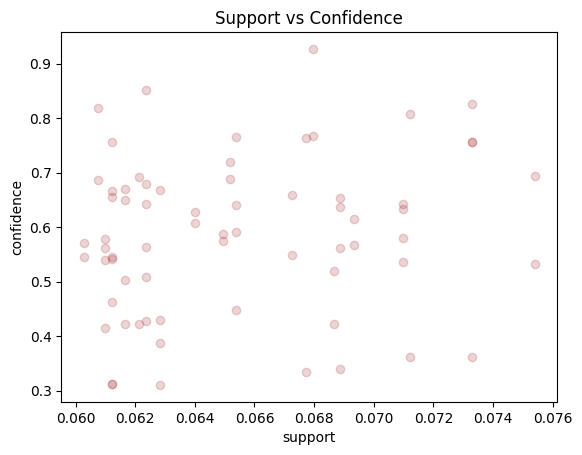

In [23]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.2,color='brown')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

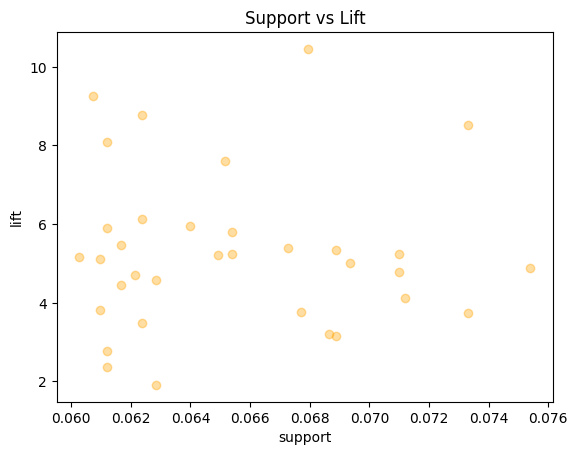

In [24]:
plt.scatter(rules['support'], rules['lift'], alpha=0.2,color='orange')
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

## Market Basket Analysis

In [25]:
%%capture
!sudo apt-get update --fix-missing

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
#pip install spark

In [26]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName('fpgrowth') \
    .getOrCreate()

spark   

In [ ]:
#files.upload()

In [48]:
from google.colab import files
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas


sparkdata = spark.createDataFrame(data)

basketdata = sparkdata.dropDuplicates(['CustomerID', 'Itemname']).sort('CustomerID')
basketdata = basketdata.groupBy("CustomerID").agg(F.collect_list("Itemname")).sort('CustomerID')


TypeError: ignored

In [29]:
#Frequent Pattern Growth – FP Growth is a method of mining frequent itemsets
fpGrowth = FPGrowth(itemsCol="collect_list(itemname)", minSupport=0.006, minConfidence=0.006) 
model = fpGrowth.fit(basketdata)

# Display frequent itemsets.
model.freqItemsets.show()
items = model.freqItemsets
# Display generated association rules.
model.associationRules.show()
rules = model.associationRules
# transform examines the input items against all the association rules and summarize the
# consequents as prediction
model.transform(basketdata).show()
transformed = model.transform(basketdata)

NameError: ignored

In [40]:
# Convert the Spark DataFrame back to a Pandas DataFrame using Arrow
result_pdf = items.select("*").toPandas()
result_pdf.head()

AttributeError: ignored

In [41]:
result_pdf.to_excel('result_pdfItemsFreq.xlsx')

NameError: ignored

In [42]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

AttributeError: ignored

In [43]:
rules_pdf.to_excel('rules_pdfAnteConseConfLift.xlsx')

NameError: ignored

In [44]:
transformed_pdf = transformed.select("*").toPandas()
transformed_pdf.head()

NameError: ignored

In [45]:
transformed_pdf.to_excel('transformed_pdfSalesTransactionIDCollectListPred.xlsx')

NameError: ignored